In [2]:
# combine all the data into one csv file

import os

path = "data"
files = os.listdir(path)
comments = []
for file in files:
    if file.startswith("comments"):
        print(file)
        df = open(f"{path}/{file}", "r").read()
        with open(f"{path}/comments.csv", "w") as f:
            f.write(df)
        

In [14]:
import pandas as pd

posts = pd.read_csv(f"{path}/posts.csv")
posts.head()

/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_12980/427887105.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  posts = pd.read_csv(f"{path}/posts.csv")


,id,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments,score,created,d_
0,tl4xj3,Us3l3ssZ3D,1648059051,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Question on how to make my Weapon Stronger,"Hey, I am currently enjoying the Ornamental St...",1.0,0,1,NaN,NaN
1,tl4xd9,Key-College-4290,1648059048,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Anyone else get bored after they get to mounta...,"I've done a couple playthroughs now, and a cou...",1.0,0,1,NaN,NaN
2,tl4wvb,Zoiwillxxx,1648059039,https://i.redd.it/607ofk61c6p81.jpg,https://www.reddit.com/r/Eldenring/comments/tl...,"Welcome champions, to the Radahn Festival!!!",NaN,1.0,0,1,NaN,NaN
3,tl4wpl,LuneMiester,1648059036,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Can’t find player I invaded now I’m stuck,So I tried the bloody finger thing for the que...,1.0,0,1,NaN,NaN
4,tl4vt6,Epickartoffelz,1648058994,https://i.redd.it/21h38yc0c6p81.jpg,https://www.reddit.com/r/Eldenring/comments/tl...,:’),NaN,1.0,0,1,NaN,NaN


In [21]:
import datetime as dt

def utc_to_date_string(utc:int) -> str:
    date = dt.datetime.fromtimestamp(utc).date()
    return date.strftime("%Y-%m-%d")

posts["created_date"] = posts["created_utc"].apply(utc_to_date_string)
posts["contents"] = posts["title"] + posts["selftext"]

posts = posts[["id", "created_date", "contents", "score", "author", "created_utc", "url", "full_link", "title", "selftext", "upvote_ratio", "num_comments"]]

posts.to_csv("posts_processes.csv", index=None)
posts.head()

,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
0,tl4xj3,2022-03-23,"Question on how to make my Weapon StrongerHey,...",1,Us3l3ssZ3D,1648059051,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Question on how to make my Weapon Stronger,"Hey, I am currently enjoying the Ornamental St...",1.0,0
1,tl4xd9,2022-03-23,Anyone else get bored after they get to mounta...,1,Key-College-4290,1648059048,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Anyone else get bored after they get to mounta...,"I've done a couple playthroughs now, and a cou...",1.0,0
2,tl4wvb,2022-03-23,NaN,1,Zoiwillxxx,1648059039,https://i.redd.it/607ofk61c6p81.jpg,https://www.reddit.com/r/Eldenring/comments/tl...,"Welcome champions, to the Radahn Festival!!!",NaN,1.0,0
3,tl4wpl,2022-03-23,Can’t find player I invaded now I’m stuckSo I ...,1,LuneMiester,1648059036,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Can’t find player I invaded now I’m stuck,So I tried the bloody finger thing for the que...,1.0,0
4,tl4vt6,2022-03-23,NaN,1,Epickartoffelz,1648058994,https://i.redd.it/21h38yc0c6p81.jpg,https://www.reddit.com/r/Eldenring/comments/tl...,:’),NaN,1.0,0


In [16]:
comments = pd.read_csv(f"{path}/comments.csv")
comments.head()

,Unnamed: 0,author,body,created_utc,id,permalink,score,created,d_
0,0,Bubbly-Diver1999,When I saw the bear i started to expect this o...,1646129604,hyw9bc6,/r/Eldenring/comments/t3quwh/thank_you_elden_r...,1,1.646122e+09,"{'author': 'Bubbly-Diver1999', 'body': 'When I..."
1,1,WeTakeWesteros,I guess the point is that if it was going to d...,1646129598,hyw9b2e,/r/Eldenring/comments/t3k2il/none_of_us_were_p...,1,1.646122e+09,"{'author': 'WeTakeWesteros', 'body': ""I guess ..."
2,2,PlainLeviathan,I am over 50 hours in and I legitimately want ...,1646129598,hyw9b1n,/r/Eldenring/comments/t44k3s/radahn_might_be_o...,1,1.646122e+09,"{'author': 'PlainLeviathan', 'body': 'I am ove..."
3,3,ConsequenceBusy1717,But at some point no signs a available anymore...,1646129597,hyw9b0g,/r/Eldenring/comments/t44dcm/need_help_with_ra...,1,1.646122e+09,"{'author': 'ConsequenceBusy1717', 'body': 'But..."
4,4,Existing_Group_3961,There is another church of communion,1646129596,hyw9az1,/r/Eldenring/comments/t44p3w/is_there_anything...,1,1.646122e+09,"{'author': 'Existing_Group_3961', 'body': 'The..."


In [25]:
def parent_id(permalink:str) -> str:
    """Get parent id from permalink
    """

    return permalink.split("/")[4]



comments["created_date"] = comments["created_utc"].apply(utc_to_date_string)
comments["parent_id"] = comments["permalink"].apply(parent_id)
comments = comments[["author", "body", "created_date", "created_utc", "id", "parent_id", "permalink", "score"]]

comments.to_csv("comments_processes.csv", index=None)
comments.head()

,author,body,created_date,created_utc,id,parent_id,permalink,score
0,Bubbly-Diver1999,When I saw the bear i started to expect this o...,2022-03-01,1646129604,hyw9bc6,t3quwh,/r/Eldenring/comments/t3quwh/thank_you_elden_r...,1
1,WeTakeWesteros,I guess the point is that if it was going to d...,2022-03-01,1646129598,hyw9b2e,t3k2il,/r/Eldenring/comments/t3k2il/none_of_us_were_p...,1
2,PlainLeviathan,I am over 50 hours in and I legitimately want ...,2022-03-01,1646129598,hyw9b1n,t44k3s,/r/Eldenring/comments/t44k3s/radahn_might_be_o...,1
3,ConsequenceBusy1717,But at some point no signs a available anymore...,2022-03-01,1646129597,hyw9b0g,t44dcm,/r/Eldenring/comments/t44dcm/need_help_with_ra...,1
4,Existing_Group_3961,There is another church of communion,2022-03-01,1646129596,hyw9az1,t44p3w,/r/Eldenring/comments/t44p3w/is_there_anything...,1


In [24]:
def parent_id(permalink:str) -> str:
    """Get parent id from permalink
    """
    
    return permalink.split("/")[4]


In [22]:
a = "/r/Eldenring/comments/tllean/to_those_hackers/"
a.split("/")

['', 'r', 'Eldenring', 'comments', 'tllean', 'to_those_hackers', '']

(-50.150000000000006, 1053.15)

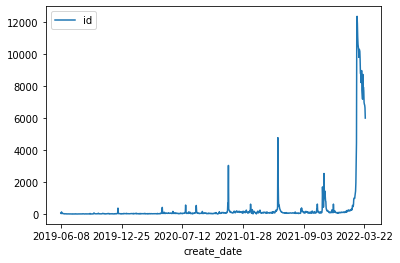

In [11]:
# plot of daily post numbers
from matplotlib import pyplot as plt

df.groupby("create_date").count().plot(y="id")
plt.xlim()

In [12]:
df["contents"] = df["title"] + df["selftext"]
df.head()

,id,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments,score,created,d_,create_date,contents
0,tl4xj3,Us3l3ssZ3D,1648059051,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Question on how to make my Weapon Stronger,"Hey, I am currently enjoying the Ornamental St...",1.0,0,1,NaN,NaN,2022-03-23,"Question on how to make my Weapon StrongerHey,..."
1,tl4xd9,Key-College-4290,1648059048,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Anyone else get bored after they get to mounta...,"I've done a couple playthroughs now, and a cou...",1.0,0,1,NaN,NaN,2022-03-23,Anyone else get bored after they get to mounta...
2,tl4wvb,Zoiwillxxx,1648059039,https://i.redd.it/607ofk61c6p81.jpg,https://www.reddit.com/r/Eldenring/comments/tl...,"Welcome champions, to the Radahn Festival!!!",NaN,1.0,0,1,NaN,NaN,2022-03-23,NaN
3,tl4wpl,LuneMiester,1648059036,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Can’t find player I invaded now I’m stuck,So I tried the bloody finger thing for the que...,1.0,0,1,NaN,NaN,2022-03-23,Can’t find player I invaded now I’m stuckSo I ...
4,tl4vt6,Epickartoffelz,1648058994,https://i.redd.it/21h38yc0c6p81.jpg,https://www.reddit.com/r/Eldenring/comments/tl...,:’),NaN,1.0,0,1,NaN,NaN,2022-03-23,NaN


In [13]:
df.head().to_clipboard()